In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
plt.style.use('seaborn-dark')

In [47]:
df = pd.read_csv('cleaned_data/imputed_customers.csv')
X = df[['age','income','membership_years','weekly_transactions','weekly_amount_spent']]
X.head()

,age,income,membership_years,weekly_transactions,weekly_amount_spent
0,55.0,112000.0,1.030137,0.75,19.2525
1,75.0,100000.0,1.213699,1.75,39.8175
2,68.0,70000.0,0.249315,0.75,14.4325
3,65.0,53000.0,0.457534,0.75,9.1075
4,58.0,51000.0,0.704110,1.00,3.9050


In [48]:
# Scale X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

# Transform samples using the PCA fit
pca_2d = pca.transform(X)

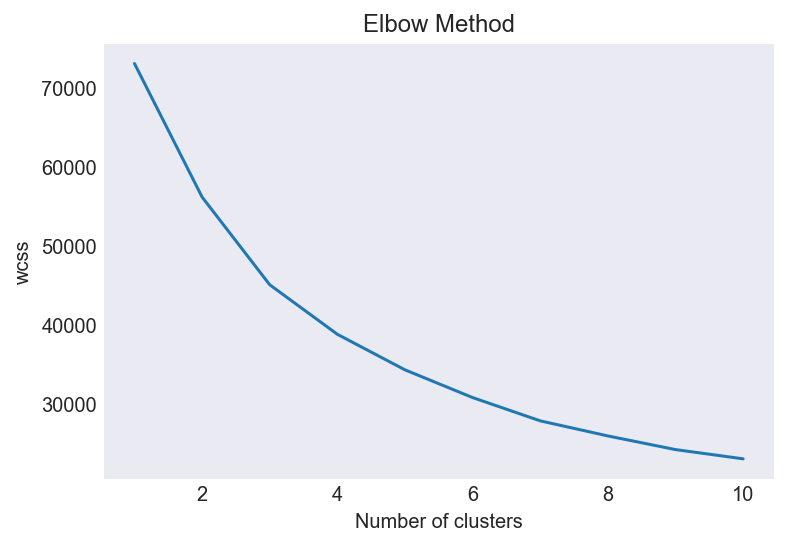

In [49]:
# Use the elbow method
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [61]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=4)

# Fit and predict 
y_means = kmeans.fit_predict(X)

df['cluster'] = kmeans.fit_predict(X)

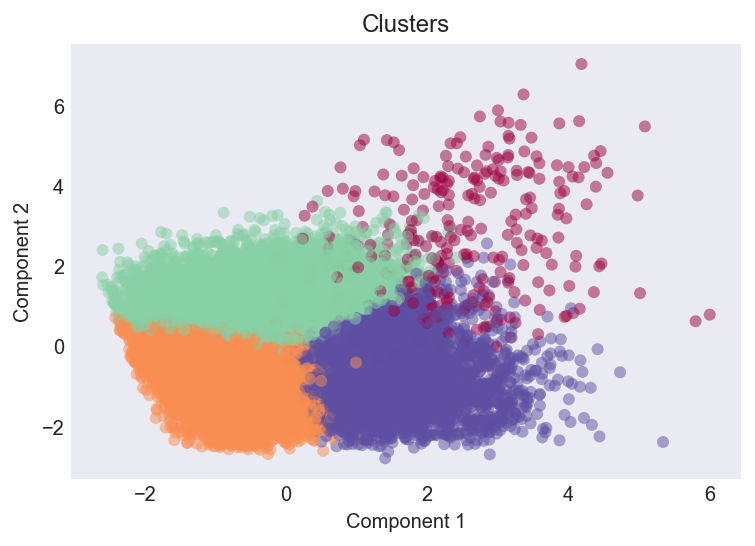

In [62]:
# fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none",
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Clusters')
plt.show()

In [63]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['age','income','membership_years','weekly_transactions','weekly_amount_spent'])
centroids['cluster'] = centroids.index
centroids

,age,income,membership_years,weekly_transactions,weekly_amount_spent,cluster
0,-0.310355,-0.541965,-0.728165,-0.542103,-0.550941,0
1,-0.368628,-0.584997,0.912064,1.153751,0.096036,1
2,0.625449,1.030355,0.078629,-0.342782,0.229280,2
3,0.123313,0.467953,0.106791,0.521685,4.917594,3


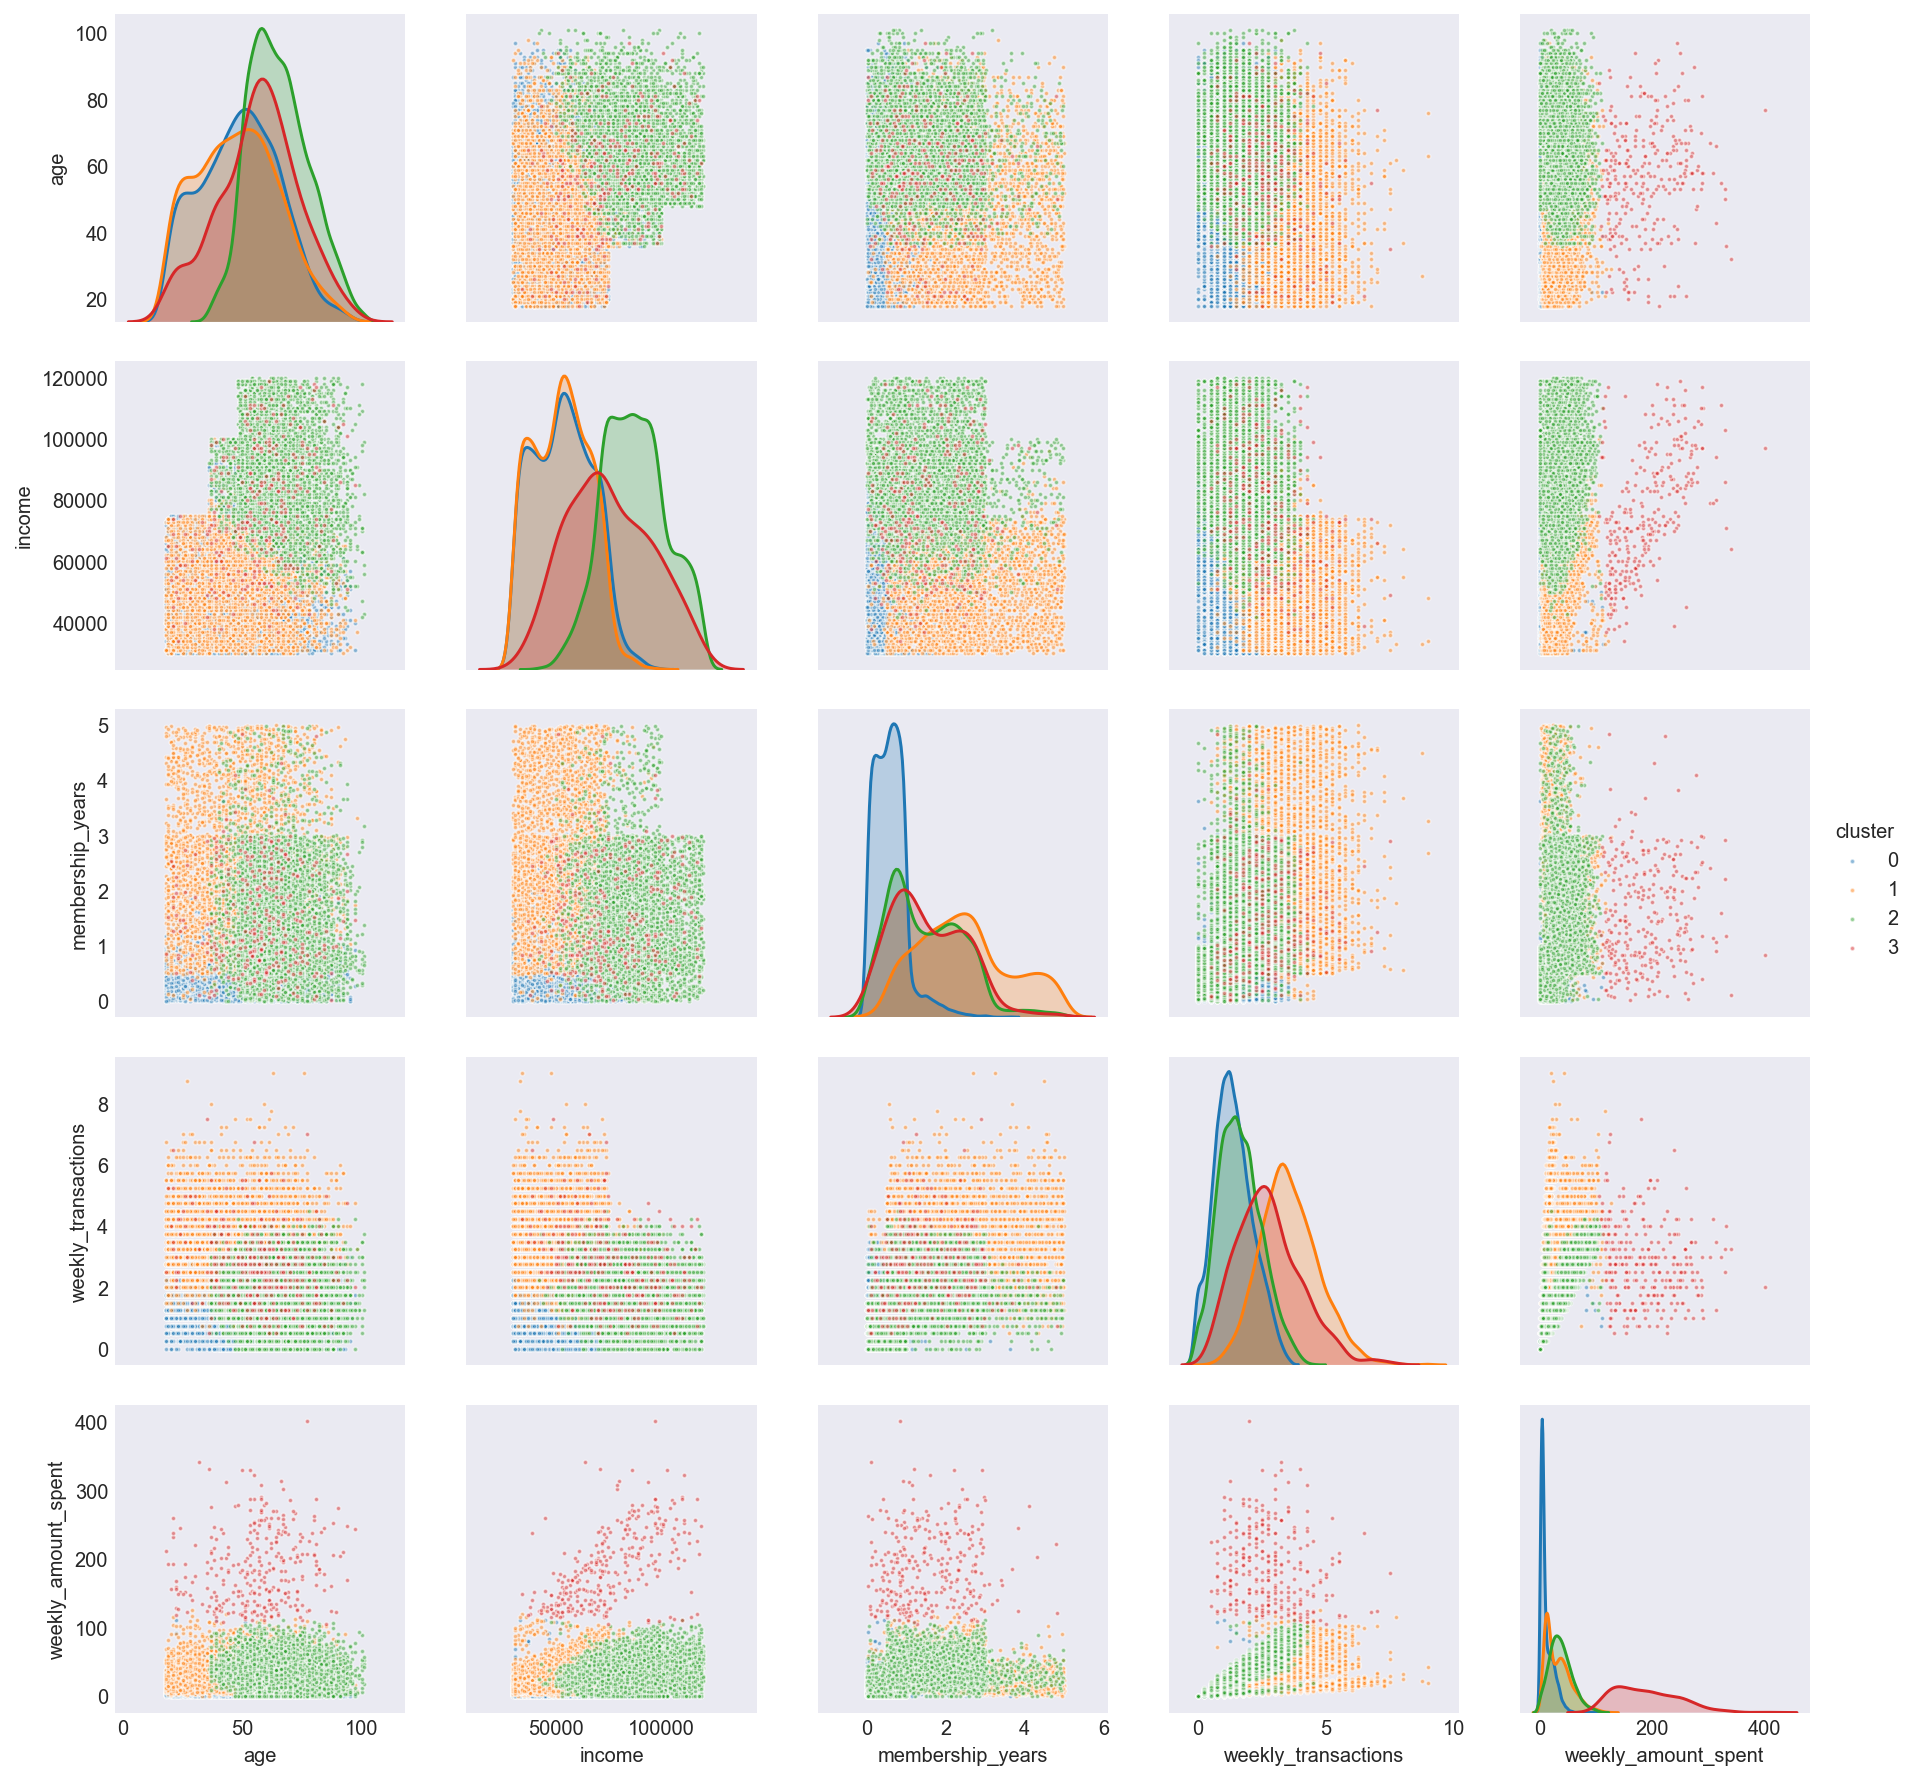

In [65]:
# Pairplot for customer demographics
sns.pairplot(df, vars=['age','income','membership_years','weekly_transactions','weekly_amount_spent'], 
                hue='cluster',
                plot_kws={'alpha':0.5, 's':5});